<img src="img/experiment_testing_tutorial_header.png" width=1400 />

# A standardized framework to test event-based experiments: A tutorial
In the past decade, there has been growing interest in the improvement of scientific practice, leading researchers to improve their application of statistical testing, increasing their sample sizes and stating their hypotheses a priorio using pre-registration. All these improvements however rely on the data to be collected properly. Surprisingly, very little attention has been given to testing and reporting critical parameters of the data collection. In our [paper](https://osf.io/preprints/psyarxiv/5ztnb), we describe a minimal protocol that can be followed to test all critical aspects of event-based experiments with minimal material and time investment. We also provide a shorthand report in [protocol.io](https://www.protocols.io/edit/testing-framework-protocol-cm8wu9xe) to ensure standard reporting and documentation of experimental setup performances in a given experiment.

## Dummy experiment
To illustrate our framework, we created a dummy experiment. This experiment consists of a 2 by 2 design in which stimuli of different shapes (squares and circles) are presented for 2 different duration (1.0 and 1.5s), for a total of 4 experimental conditions (circle/1.0s, circle/1.5s, square/1.0, square/1.5s), each repeated 10 times. Each trial lasts 2.0s, starting with the stimulus (presented for the specified duration) followed by a blank screen. In between each trial, a random inter-trial interval is drawn from a uniform distribution between 0.5 and 1.5s. 

## Learning objectives
In this notebook, we will cover all the steps presented in the framework, to the exception of peripheral integration, to keep things simple. By the end of this notebook, you will know the following:
- Preparing your experiment to run the framework
- Check the visual angle of your stimuli
- Check and report the experiment log files accuracy
- Check and report the experimental setup timing accuracy

In [2]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import mne
import numpy as np

# Preparing your experiment
Before running the check of your experiment, you should have programmed your experiment to a state where you could deploy it (i.e. use it on actual participants). 

<div class="alert alert-info"><h4>Note</h4><p> 
    The steps below have to be prepared before running the experiment.
</p></div>

## Present the photodiode to test timing accuracy
You should add a key functionality to your experiment: presenting a photodiode square. To get a ground truth of the events timing, you should display a white square at the onset of each experimental event, which then turns back to black. We recommend presenting it in a corner of the display, like so (the dark square in the top right corner):
<div style="text-align: center;">
    <img src="img/Screenshot.png" alt="Centered Image" width="500"/>
</div>


## Prepare response sequence
In our dummy experiment, participants are supposed to press the right arrow when they see a circle and the left arrow when they see a square. To be able to test that the button being pressed matches the button being logged, we will execute the response sequence during our test run and compare it to what is being logged.
Here is the arbitrary response sequence we will perform for the first 15 trials:

| Trial | Button |
| :-: | :-: |
| 1 | Left |
| 2 | Left |
| 3 | Left |
| 4 | Left |
| 5 | Left |
| 6 | Right |
| 7 | Right |
| 8 | Right |
| 9 | Right |
| 10 | Right |
| 11 | Up |
| 12 | Up |
| 13 | Up |
| 14 | Up |
| 15 | Up |

## Attach the photodiode

Finally, we will attach the photodiode recording device on top of the square that we have implemented, like so:
<div style="text-align: center;">
    <img src="img/Screenshot.png" alt="Centered Image" width="500"/>
</div>

TO BE UPDATED WITH AN ACTUAL PIC TAKEN IN THE LAB

## Visual angle check
The first aspect to check is the size of the stimuli in degrees of visual angle. As stated above, the circle and square should occupy 6 degrees of visual angle. To fullfil our protocol, the following measures must be obtained:
- Screen height and width in pixels
- Screen height and width in centimeters
- Distance between participants nasion and screen
- Stimulus heights and width in centimeters

<div style="text-align: center;">
    <img src="img/stimMeasurement Circle.jpg" alt="Centered Image" width="500"/>
</div>

For the two first, we recommend finding the model of the screen and finding the exact specifications. The distance between the participants nasion and the screen as well as the stimulus size in centimeters must be measured manually. In our case, the screen distance was of **60cm** and the measured height and witdh of each stimulus was of **6.3cm**. Based of these measurements, we can now compute the size of the stimuli in degrees of visual angle, like so:  

In [23]:
width_cm = 6.3
height_cm = 6.3
dist_cm = 60
# Compute the size of the stimulus in radians
size_rad = 2 * math.atan((width_cm/2) / dist_cm)
# Convert to degrees
size_dva = size_rad * (180.0 / math.pi)
print('The stimulus size was of {} d.v.a.'.format(size_dva))


The stimulus size was of 6.010538719379868 d.v.a.


As we can see, we are pretty close of the expected 6 degrees. All measured values can be entered in the protocol in section 4. Note that in this particular experimental design, the eccentricity does not need to be reported, as the stimuli are presented centrally. 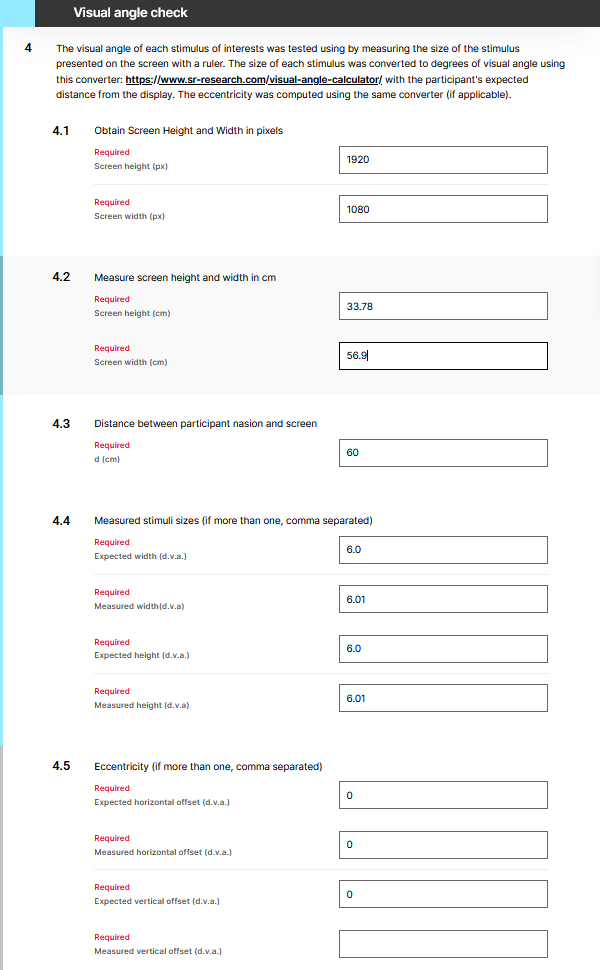

## Controlled event content logging
The goal is to check that that the events that are being logged match what was presented on the screen. Unfortunately, this is achieved by manually annotating the stimuli that one is seeing and comparing it to what is presented in the log file, which is a bit time consuming. But this only needs to be done once. 

| Trial | Shape |
| :-: | :-------: |
| 1 | square |
| 2 | square |
| 3 | square |
| 4 | circle |
| 5 | circle |
| 6 | circle |
| ... | ... |

To achieve this, the experiment was started and I manually noted what was presented on a piece of paper. I did so for 20 trials in a row:
| Trial | Shape | Logged shape |
| :-: | :-: |:-: |
| 1 | square |square |
| 2 | square |square |
| 3 | square |square |
| 4 | circle |circle |
| 5 | circle |circle |
| 6 | circle |circle |
| ... | ... | ... |

This was then compared to the information that was logged. As we can see, the two sequences are the same, so we know that the logging is correct. Note that we are ignoring the duration condition for now, this will be tested more thoroughly in the next section. We can now fill the section 5 of the protocol

# Running the experiment
<div class="alert alert-info"><h4>Note</h4><p> 
    Collecting the data required to perform the subsequent test can all be acquired within a singl experimental run
</p></div>

Once you have conducted the tests above, you should run your experiment once more, making sure to respond according to your plan response sequence. This should yield the following files:
- Behavioral log files
- Photodiode signal

Based of these files, you can now test all remaining aspects of your experiment

## Uncontrolled events logging

## Controlled event timing logging
So far, we have been testing the experiment in terms of content: making sure that the stimuli are presented in the right way and that the correct content is being logged. Now, we will test that the timing of the events is correct. To that end, the experiment was ran once in our lab. The experiement was programmed such that whenever a new event occured, a square turned from black to white. We placed a photo-sensor over this square, which enabled us to record physical changes on the screen at the onset of each new event. This recording can then be analyzed to test the timing accuracy of our experiment. We will here show how this is performed.
In our experiment, there are three events in each trial:
- Stimulus onset
- Stimulus offset
- Trial end/Start of the ITI

Using the photodiode, we can measure the actual occurence of these events to ensure that our experiment is behaving properly in term of timing. In other words, we want to make sure that the events occur at the time they are supposed to and last for as long as we expect them to last. 

In [3]:
# Loading the data:
log_file = r"C:\Users\alexander.lepauvre\Documents\GitHub\ExperimentTestingFramework\dummyExperiment\TestData\sub-102_ses-1_task-Dummy_events.csv"
photodiode_file = r"C:\Users\alexander.lepauvre\Documents\GitHub\ExperimentTestingFramework\dummyExperiment\TestData\sub102.vhdr"

# Load the files:
log = pd.read_csv(log_file)
raw = mne.io.read_raw_brainvision(photodiode_file, preload=True)
photo_channel = "Fp1"

Extracting parameters from C:\Users\alexander.lepauvre\Documents\GitHub\ExperimentTestingFramework\dummyExperiment\TestData\sub102.vhdr...
Setting channel info structure...
Reading 0 ... 272739  =      0.000 ...   272.739 secs...


Once the data are loaded, the first step is to plot the photodiode signal. The signal should contain stark bursts corresponding to a change from the square being black to white, marking the onset of an event. By checking the signal, we can set a threshhold to detect when the square was "on"

Text(0.5, 0, 'Time (s)')

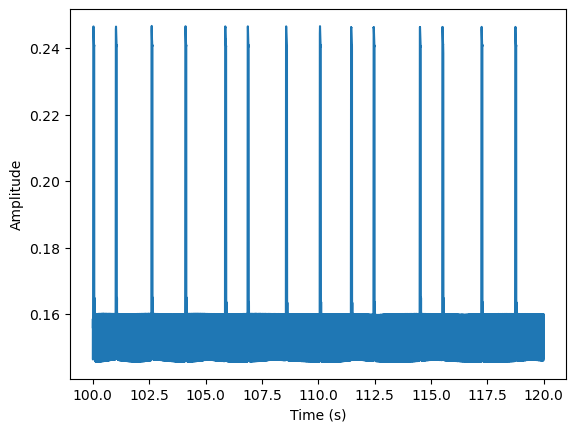

In [7]:
# Extract the photodiode signal:
pd_signal = np.squeeze(raw.get_data(picks=photo_channel))

# PLot part of the signal:
fig, ax = plt.subplots()
ax.plot(raw.times[100000:120000], pd_signal[100000:120000])
ax.set_ylabel("Amplitude")
ax.set_xlabel("Time (s)")

We can clearly see the peaks in the signal above. There is quite some noise between 0.14 and 0.165 (units are mV, but it does not matter here), but the peaks are clearly above the noise and setting a threshold at **0.18** ensures that we do not get false positive (i.e. detecting that the square was turned white when it fact is remained black). Based on this threshol, we can binarize the signal to clean it up.

Text(0.5, 1.0, 'Binarized photodiode signal')

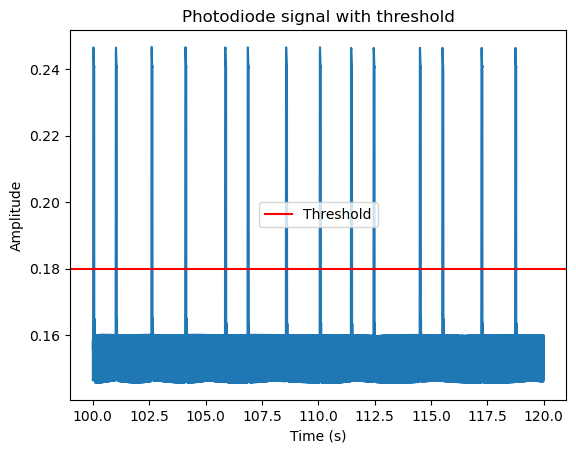

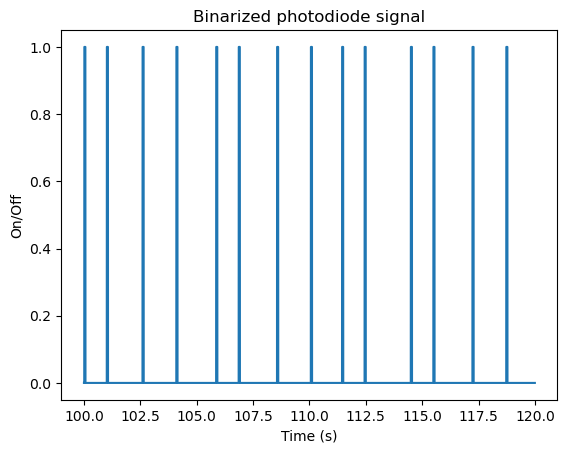

In [10]:
# Set our threshold:
thresh = 0.18

# Display the signal with the threshold:
fig, ax = plt.subplots()
ax.plot(raw.times[100000:120000], pd_signal[100000:120000])
ax.axhline(thresh, raw.times[0], raw.times[10000], c='r', label='Threshold')
ax.set_ylabel("Amplitude")
ax.set_xlabel("Time (s)")
ax.set_xlim
ax.set_title("Photodiode signal with threshold")
plt.legend()

# Binarizing the signal:
pd_bin = (pd_signal > thresh).astype(int)
fig, ax = plt.subplots()
ax.plot(raw.times[100000:120000], pd_bin[100000:120000])
ax.set_ylabel("On/Off")
ax.set_xlabel("Time (s)")
ax.set_title("Binarized photodiode signal")

Now that we have cleaned up the signal, we can detect the onset of each event. Remember that in our experiment, the square was flashed white at the beginning of each event and then turned black again after a bit. Therefore, the onset of a new stimulus can be identified by detecting when the photodiode signal turns "on". This is achieved very simply by taking the discrete difference of the binarized photodiode signal. The discrete difference simply subtract to each sample the value of the preciding sample. The binarized signal contains only ones and zeros, so the discrete difference can yield only 3 different values: 0 (no difference to previous sample), 1 (current sample is 1 while previous is 0) and -1 (current sample is 0 but previous sample is 1). We are only interested in the sample where the discrete difference yields a 1, as it corresponds to the time point where the square turned white.

Text(0.5, 1.0, 'Binarized photodiode signal')

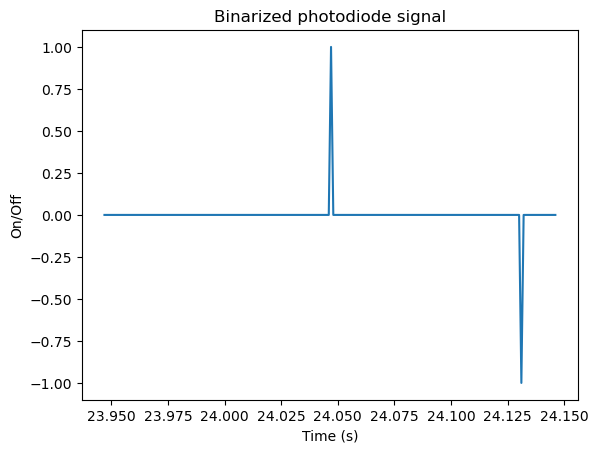

In [11]:
# Compute the discrete difference of the signal:
pd_diff = np.diff(pd_bin)
# Plot the signal to illustrate what that looks like:
fig, ax = plt.subplots()
ax.plot(raw.times[np.where(pd_diff==1)[0][0] - 100:np.where(pd_diff==1)[0][0] + 100], pd_diff[np.where(pd_diff==1)[0][0] - 100:np.where(pd_diff==1)[0][0] + 100])
ax.set_ylabel("On/Off")
ax.set_xlabel("Time (s)")
ax.set_title("Binarized photodiode signal")

As we can see, we have 2 peaks for this particular event: the first marks the transition of the photodiode from black to white and the other one marks the opposite. We can now obtain the time stamps of each events according to the photodiode like so

In [12]:
# Extract the times stamps  from the photodiode:
pd_ts = raw.times[np.where(pd_diff==1)[0]]

# Check that the length is the same as the log file:
print("{} events detected in the photodiode signal".format(pd_ts.shape[0]))
print("{} events present in the log file".format(log.shape[0] * 2))
assert log.shape[0] * 2 == pd_ts.shape[0], "Different number of events in the log file compared to the photodiode signal!"

160 events detected in the photodiode signal
160 events present in the log file


Assuming all the above steps proceeded without any issues, we can now move on to the last step, in which we compute the interval between the events measured by the log files and compare it to the ground truth of the photodiode. To ensure that there are no misalignment between the two, we overlay the plot of the intervals of the log file with the photodiode. Provided that there are no issues, then we can compare the intervals from the log file and from the photodiode to test the timing accuracy.

[1.516 1.8   1.    2.45  1.    2.184 1.5   1.133 1.5   1.717 1.5   1.116
 1.    1.617 1.5   1.633 1.5   1.334 1.    2.15  1.5   1.75  1.    2.083
 1.    2.233 1.5   1.233 1.5   1.734 1.5   1.966 1.5   1.867 1.5   1.083
 1.    1.867 1.    1.867 1.    2.183 1.    2.1   1.5   1.783 1.5   1.367
 1.5   1.2   0.999 1.584 1.5   1.766 1.    1.7   1.5   1.384 1.    2.05
 1.    1.733 1.5   1.65  1.    1.983 1.    1.65  1.    2.284 1.5   1.1
 1.    1.8   1.5   1.233 1.    2.033 1.    1.584 1.5   1.4   0.999 1.6
 1.    1.617 1.5   1.783 1.    1.784 1.5   1.6   1.5   1.966 1.    1.933
 1.    2.2   1.    2.25  1.    1.934 1.5   1.65  1.    1.616 1.    2.434
 1.5   1.183 1.    1.766 1.5   1.8   1.5   1.484 1.    2.266 1.5   1.4
 1.    1.767 1.    1.533 1.5   1.667 1.5   1.433 1.    1.95  1.5   1.617
 1.    1.567 1.5   1.316 1.5   1.767 1.    2.2   1.    1.633 1.    1.633
 1.5   1.1   1.5   1.    1.5   1.417 1.    2.15  1.5   1.716 1.5   1.534
 1.    1.616 1.5  ]
[1.5498187 1.7500307 1.0499849 2.40000

Text(0.5, 1.0, 'Timing inaccuaracies (Log - Photo)')

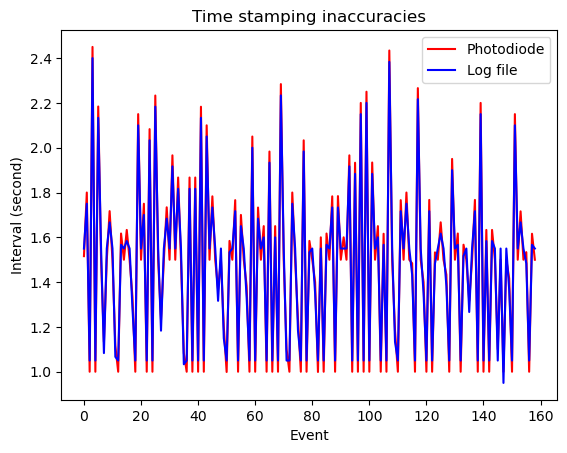

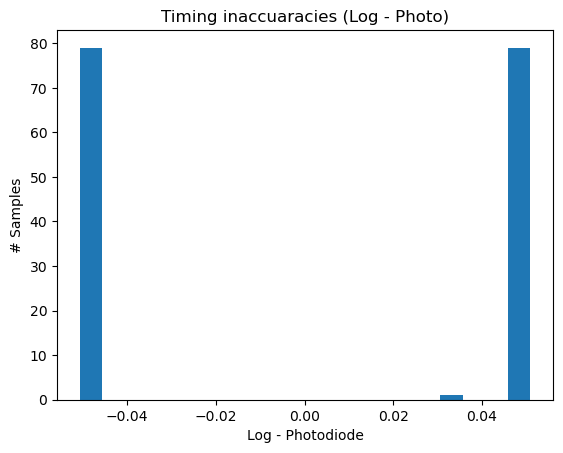

In [16]:
# Compute the intervals from both the photodiode and the log file:
pd_interval  = np.diff(pd_ts)
log_interval = np.diff(log[["stimOnset", "stimOffset"]].to_numpy().flatten())
# Overlay the two signals:
fig, ax = plt.subplots()
ax.plot(pd_interval, c="r", label="Photodiode")
ax.plot(log_interval, c="b", label="Log file")
ax.set_ylabel("Interval (second)")
ax.set_xlabel("Event")
ax.set_title("Time stamping inaccuracies")
plt.legend()
print(pd_interval)
print(log_interval)
# Plot the distribution of the difference between the two:
fig, ax = plt.subplots()
ax.hist(log_interval - pd_interval, bins=20)
ax.set_ylabel("# Samples")
ax.set_xlabel("Log - Photodiode")
ax.set_title("Timing inaccuaracies (Log - Photo)")

We we can see, there  are some timestamping inaccuracies. To report them, compute the mean and standard deviation of the interval difference. Then, we can fill the protocol:

In [14]:
mean_diff = np.mean(log_interval - pd_interval)
std_diff  = np.std(log_interval - pd_interval)
print("The timing inaccuracy is of {:.3f}+-{:.3f} sec.".format(mean_diff, std_diff))

The timing inaccuracy is of 0.000+-0.050 sec.


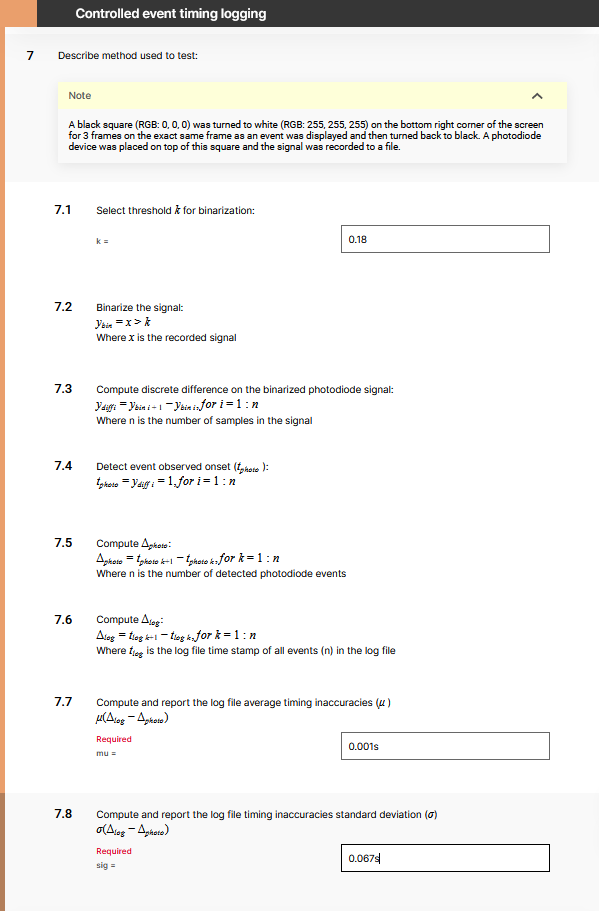